In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle


def create_training_data():

    # Loop through training class folders
    for category in Classes:

        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) 

        # Loop through images in each folder
        for img in os.listdir(path):

            # Add images to training set with correct labels
            try:
                img_array = cv2.imread(os.path.join(path, img))

                # apply the necessary transformations
                img_size = 224
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])

            except Exception as e:
                #print('Failed to Grab Image')
                pass

In [9]:
# data Directory
Datadirectory = "../Identifying-Masked-Faces-main/dataset"

# Define labels
Classes = ["ishan", "not_ishan"]

In [10]:
Datadirectory = "../Identifying-Masked-Faces-main/dataset"

Classes = ["ishan", "not_ishan"]

img_size = 224

training_Data = []

create_training_data()

random.shuffle(training_Data)

X = [] # Features
y = [] # label

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
Y = np.array(y)

X = X/255


model = tf.keras.applications.mobilenet.MobileNet()

base_input = model.layers[0].input
base_ouput = model.layers[-4].output

# Modify transfer model's last layer
Flat_layer = layers.Flatten()(base_ouput)
final_output = layers.Dense(1)(Flat_layer)

final_output = layers.Activation('sigmoid')(final_output)

new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

new_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

epochs = 20
new_model.fit(X, Y, epochs = epochs, validation_split = 0.1)

new_model.save("ishan_With_Mask_Detection.h5")


17227776/17225924 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
______________________________________________________________

Epoch 1/20
20/20 [==============================] - 97s 5s/step - loss: 0.1961 - accuracy: 0.9073 - val_loss: 2.7712 - val_accuracy: 0.0986
Epoch 2/20
20/20 [==============================] - 96s 5s/step - loss: 4.1169e-04 - accuracy: 1.0000 - val_loss: 0.9795 - val_accuracy: 0.5352
Epoch 3/20
20/20 [==============================] - 95s 5s/step - loss: 7.4292e-05 - accuracy: 1.0000 - val_loss: 0.5078 - val_accuracy: 0.7887
Epoch 4/20
20/20 [==============================] - 94s 5s/step - loss: 3.3980e-05 - accuracy: 1.0000 - val_loss: 0.2016 - val_accuracy: 0.9577
Epoch 5/20
20/20 [==============================] - 94s 5s/step - loss: 2.9540e-05 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 0.9718
Epoch 6/20
20/20 [==============================] - 94s 5s/step - loss: 2.2167e-05 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 95s 5s/step - loss: 2.1756e-05 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0

In [19]:
# Function for applying transformations
def apply_image_trans(img):
    img_size = 224
    final_image = cv2.resize(img, (img_size, img_size))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    return final_image

# Function for interpreting the sigmoid output
def convert_sigmoid_output(sigmoid):
    if(sigmoid < 0.50):
        print('\nHi, Ishan!\n')
    elif(sigmoid > 0.50):
        print('\nThis person is not Ishan!\n')
    else:
        print('\nNot Sure!\n')


Hi, Ishan!



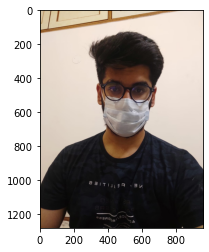

In [20]:
frame = cv2.imread('../Identifying-Masked-Faces-main/dataset/ishan/ishan_01.jpeg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

final_image = apply_image_trans(frame)

Prediction = new_model.predict(final_image)
convert_sigmoid_output(Prediction)


Hi, Ishan!



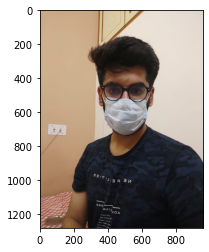

In [21]:

Not Kaveh test 2frame = cv2.imread('../Identifying-Masked-Faces-main/dataset/ishan/ishan_07.jpeg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# apply transformations to the picture 
final_image = apply_image_trans(frame)

# this is the sigmoid output
Prediction = new_model.predict(final_image)
convert_sigmoid_output(Prediction)


This person is not Ishan!



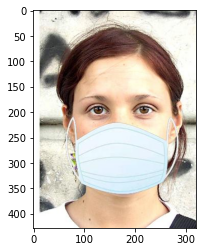

In [22]:
frame = cv2.imread('../Identifying-Masked-Faces-main/dataset/not_ishan/376-with-mask.jpg')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# apply transformations to the picture 
final_image = apply_image_trans(frame)

# this is the sigmoid output
Prediction = new_model.predict(final_image)
convert_sigmoid_output(Prediction)